In [14]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


Loading opinions from .json files 

In [15]:
print(*[filename.split(".")[0] for filename in os.listdir("./opinions")], sep="\n")

99105003


In [16]:
product_id = input("Enter product code, please: ")

In [17]:
opinions = pd.read_json(f"./opinions/{product_id}.json")
opinions

,opinion_id,author,recommendation,stars,content_pl,pros_pl,cons_pl,vote_yes,vote_no,published,purchased,content_en,pros_en,cons_en
0,14268101,s...3,1.0,5.0,"Laptop jest perfekcyjny, tylko nie za bardzo m...","[audio (dolby, bateria, jakość, wydajność, wyg...",[],11,2,2021-04-10 18:42:54,2021-03-10 22:32:01,"The laptop is perfect, but I don't really like...","[Audio (Dolby, battery, quality, efficiency, a...",[]
1,15147658,b...1,1.0,4.5,Za tą cenę - nie ma równych na rynku🔝. \nPerfe...,"[bateria, jakość, wydajność, wygląd]",[],5,2,2021-10-30 17:23:04,2021-09-30 07:32:20,For the price - there is no equal on the marke...,"[battery, quality, efficiency, appearance]",[]
2,14228418,s...e,1.0,5.0,"Jakość wykonania na najwyższym poziomie, pojem...","[audio (dolby, bateria, jakość, wydajność, wyg...",[],3,4,2021-04-04 00:45:49,2021-03-17 10:32:40,The quality of workmanship at the highest leve...,"[Audio (Dolby, battery, quality, efficiency, a...",[]
3,13786487,Tomasz,1.0,5.0,Jeszcze przed Sylwestrem 2020 kupiłem nowy mod...,"[bateria, jakość, wydajność, wygląd]",[],3,1,2021-01-17 11:26:10,None,Even before New Year's Eve 2020 I bought a new...,"[battery, quality, efficiency, appearance]",[]
4,14313169,k...k,1.0,5.0,Jako użytkownik systemu windows i laptopów/kom...,"[audio (dolby, bateria, jakość, wydajność, wyg...",[],0,0,2021-04-18 20:07:28,2021-04-13 23:01:00,As a user of Windows and laptops/computers bas...,"[Audio (Dolby, battery, quality, efficiency, a...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,13393559,Aleksander,1.0,5.0,Świetny sprzęt.,"[bateria, jakość, wydajność, wygląd]",[],5,2,2020-11-17 17:08:24,None,Great equipment.,"[battery, quality, efficiency, appearance]",[]
171,13992004,b...8,0.0,0.5,Nie wiem bo czekam od miesiąca,[],[],0,5,2021-02-20 10:17:59,2021-01-29 10:54:05,I don't know because I have been waiting for a...,[],[]
172,15441390,m...k,0.0,0.5,Szrot,[],"[bateria, jakość, wydajność, wygląd]",1,4,2021-12-28 15:42:04,2021-12-21 14:41:52,Script,[],"[battery, quality, efficiency, appearance]"
173,13541695,Użytkownik Ceneo,0.0,1.0,Ten komputer nie został wyprodukowany oprócz k...,[wygląd],"[bateria, jakość, wydajność]",1,12,2020-12-09 21:04:04,None,This computer was not produced except for a fe...,[appearance],"[battery, quality, efficiency]"


Basic Statistics

In [18]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros_pl.astype(bool).sum()
cons_count = opinions.cons_pl.astype(bool).sum()
pros_cons_count = opinions.apply(lambda o: bool(o.pros_pl) and bool(o.cons_pl), axis=1).sum()
average_rate = opinions.stars.mean()
print(f"Number of opinins about the product: {opinions_count}")
print(f"Number of opinions in which advantages have been listed: {pros_count}")
print(f"Number of opinions in which disadvantages have been listed: {cons_count}")
print(f"Number of opinions in which both advantages and disadvantages have been listed: {pros_cons_count}")
print(f"The average rate of the product: {average_rate:.2f}")


Number of opinins about the product: 175
Number of opinions in which advantages have been listed: 108
Number of opinions in which disadvantages have been listed: 9
Number of opinions in which both advantages and disadvantages have been listed: 4
The average rate of the product: 4.79


In [19]:
pros = opinions.pros_en.explode().value_counts()
cons = opinions.cons_en.explode().value_counts()
print(pros)
print(cons)


pros_en
efficiency      107
quality         106
battery         106
appearance      105
Audio (Dolby     22
Name: count, dtype: int64
cons_en
battery         7
quality         7
efficiency      6
appearance      6
Audio (Dolby    1
Name: count, dtype: int64


Charts

In [20]:
if not os.path.exists("./pie_charts"): 
    os.mkdir("./pie_charts")
if not os.path.exists("./bar_charts"): 
    os.mkdir("./bar_charts")

In [21]:
recommendations = opinions.recommendation.value_counts(dropna=False).reindex([False, True, np.nan], fill_value=0)
recommendations


recommendation
False      6
True     167
NaN        2
Name: count, dtype: int64

FileNotFoundError: [Errno 2] No such file or directory: './pie_chart/99105003.png'

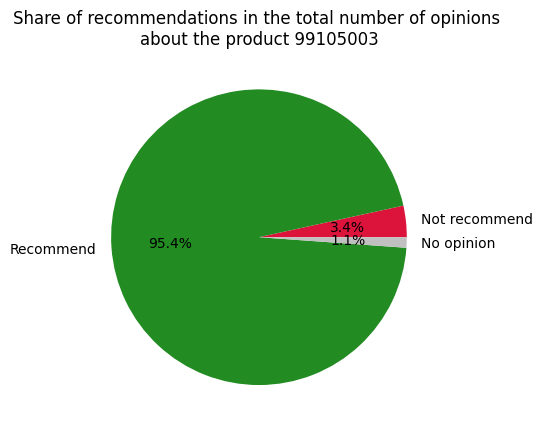

In [22]:
recommendations.plot.pie(
    label = "",
    labels = ["Not recommend", "Recommend", "No opinion"],
    colors = ["crimson", "forestgreen", "silver"],
    autopct = lambda v: f"{v:.1f}%" if v > 0 else "",
    title = f"Share of recommendations in the total number of opinions \nabout the product {product_id}"
)
plt.savefig(f"./pie_chart/{product_id}.png")
plt.close()

In [23]:
stars = opinions.stars.value_counts()
stars

stars
5.0    151
4.5     13
4.0      3
1.0      3
0.5      2
3.0      1
3.5      1
1.5      1
Name: count, dtype: int64

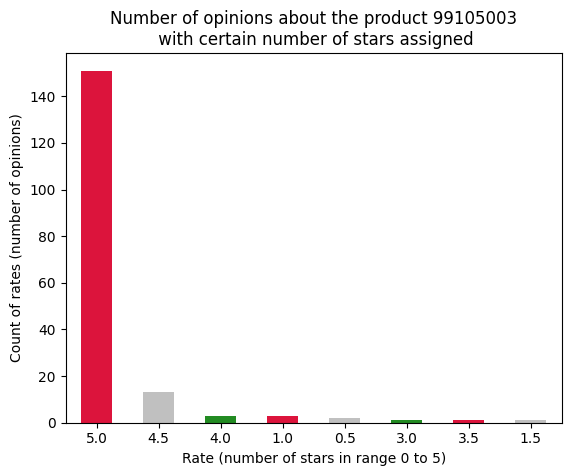

In [24]:
stars.plot.bar(
    xlabel = "Rate (number of stars in range 0 to 5)",
    ylabel = "Count of rates (number of opinions)",
    title = f"Number of opinions about the product {product_id}\n with certain number of stars assigned",
    color = {"crimson" if x<3 else "forestgreen" if x>3.5 else "silver" for x in stars.index}
)
plt.xticks(rotation=0)
plt.show()